Vasilii Karmazin, učo 540500

# PA228: Machine Learning in Image Processing

```
The project aims to demonstrate the knowledge you gained during the semester. All topics are open problems that do not have only one correct solution. You should choose a topic that you are interested in and which also fits your skills.

None of the topics are new to the machine learning community, and there are several ways to solve them. A crucial part of your task will be to research at least some of these approaches and summarize them. Be sure that you fully understand the techniques you use because one of the main factors influencing your final grade will be how well-justified your approach is. Once you have decided on a method, you will have to prepare your training data, build a model, train it as well as you can, then evaluate its performance. Afterward, you will be expected to write a short report about your experiences and also the knowledge you gained over the course of the project. 

Remember that the aim of the project is not to train a perfect NN model that can beat all other methods. Rather, you should show that you are capable of solving an image-processing task with machine-learning techniques.


Objectives:

- Study state-of-the-art approaches related to your task. Cite at least three ML IP papers on this topic, and introduce the basic ideas behind each method.
- Implement one of the methods you found. You can improve an existing implementation of the method you choose. Remember the faculty's code of conduct and list all your resources and collaborations.
- Train a model and evaluate its performance, then compare the results to another non-trivial model. Show that your model is appropriately trained. If you made any improvements to standard techniques, do not forget to validate the benefits.
- Write a report of your experiences with the task. List what difficulties you encountered and how you might improve upon your work in the future. The report can be submitted as a Jupyter Notebook or as formatted text. 
```

## Semestral project: Deformable Convolutions on Semantic Segmentation task

Before choosing a topic, I already knew other types of Convolutions: Dilated Convolution, Graph Convolutions, 1D or 3D Convolutions and other similar approaches, but I heard about Deformable Convolutions for the first time in this course. Due to the novelty of the approach, the topic was chosen for the project. We will try this approach for the Semantic Segmentation task on ADE20K dataset.

Also, for me, this is an opportunity to try to train a deep neural network that solves a complex problem.

References:
- Paper: [Deformable Convolutional Networks](https://arxiv.org/abs/1703.06211)
- Paper: [Deformable ConvNets v2: More Deformable, Better Results](https://arxiv.org/abs/1811.11168)
- Video: [ICCV17 | 133 | Deformable Convolutional Networks](https://www.youtube.com/watch?v=HRLMSrxw2To)
- Paper: [Semantic Understanding of Scenes through the ADE20K Dataset](https://arxiv.org/abs/1608.05442)
- Blog: [Behind the Scenes: Setting a Baseline for Image Segmentation Speedups](https://www.mosaicml.com/blog/behind-the-scenes)
- Paper: [Accurate, large minibatch sgd: Training imagenet in 1 hour](https://arxiv.org/abs/1706.02677)

## Deformable Convolutions

![](resources/deformable-convolutions.png)

Deformable Convolutions are a type of convolutional neural network module that can handle geometric transformations in object scale, pose, viewpoint, and part deformation. They were introduced to address the limitations of traditional CNNs in modeling complex, unknown transformations.

Deformable Convolutions add 2D offsets to the regular grid sampling locations in the standard convolution, which enables free-form deformation of the sampling grid. These offsets are learned from the preceding feature maps via additional convolutional layers, which allows for the deformation to be conditioned on the input features in a local, dense, and adaptive manner. This type of convolutions can solve several problems that traditional CNNs cannot. For example, they can adaptively determine receptive field sizes and scales for visual recognition with fine localization, such as semantic segmentation. They can also enable adaptive part localization for objects with different shapes, which is especially useful for non-rigid objects.

They are lightweight and can replace regular convolutions with minimal additional parameters and computation required for offset learning. However, their performance may be dependent on the dataset and task, and their use may increase the computational complexity and training time of a model.

The first appearance of Deformable Convolutions appeared in the paper "Deformable Convolutional Networks", where the authors introduced a new kind of convolution and pooling using learnable offset, and also achieved better results in various computer vision tasks by replacing several standard convolutions with new ones.

### Modulation mechanism

The paper "Deformable ConvNets v2: More Deformable, Better Results" introduce the modulation mechanism of Deformable Convolution as a way to improve the performance of the original Deformable Convolution. The modulation mechanism involves the addition of a modulation vector to the offset vector used to sample the input feature map during the convolution operation.

The modulation vector is generated by passing the input feature map through a small convolutional layer/network, which produces a set of scalar values that modulate the offset vector. This modulation allows the Deformable Convolution to adaptively adjust the sampling locations of the input feature map based on the spatial characteristics of the input.

The modulation mechanism improves the ability of the deformable convolution to handle complex geometric transformations, particularly in situations where the input feature map has varying degrees of spatial context. It also enhances the sensitivity of the deformable convolution to subtle changes in object appearance, improving its performance on object recognition and detection tasks.

## Semantic Segmentation

![](resources/semantic-segmentation.png)

Semantic segmentation is a computer vision problem that involves assigning a class label to each pixel in an image. In other words, the goal of semantic segmentation is to identify and classify the objects and regions within an image based on their semantic meaning. This is different from other types of image segmentation, such as instance segmentation or boundary detection, which focus on identifying individual objects or boundaries between objects.

This is a challenging problem because it requires the model to have a comprehensive understanding of the visual world and the ability to distinguish between different object classes and their boundaries accurately. Many deep learning-based approaches are exists and one of them is using a deformable convolutions, which could capture semantic in complex and diverse environments.

### ADE20K dataset

![](resources/ade20k-example.png)

ADE20K dataset is a large-scale scene parsing dataset for semantic segmentation tasks, which contains over 20,000 images covering a diverse range of scenes and objects. The dataset is annotated with 150 object categories and 400 scene categories, making it one of the most comprehensive datasets for semantic segmentation.

The ADE20K dataset is organized in a hierarchical structure, which allows for the modeling of complex scenes. The hierarchy consists of three levels: the scene level, object level, and part level. At the scene level, the dataset includes 400 scene categories, such as indoor, outdoor, and urban scenes. At the object level, the dataset includes 150 object categories, such as person, car, and furniture. Finally, at the part level, the dataset includes 1,038 part categories, such as arm, tire, and cushion. 

The dataset is very carefully labeled by special people who understand the domain and the task. Annotations are very detailed in places, such as books on a bookshelf or windows on a city skyline. 

The complexity of the ADE20K dataset lies in its hierarchical structure and the diversity of scenes and objects. Objects in the same hierarchy can confuse algorithms. More complex algorithms or combinations of algorithms can be used to solve dataset problems.

We will use object categories, which is classification to 150 different hierarchical classes.

# Before running code

## Installing dependencies

We need to prepare our Python environment by installing the libraries from `requirements.txt`.

Note, that the versions of the libraries are set, but it's not strict and maybe lower versions will work just fine.

In [3]:
pip install -qU -r requirements.txt --user


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Downloading dataset

We will upload the 2016 ADE20K dataset. The newer version has more training data, but all benchmarks use 2016, so we'll do the same.

Note: There is no need to download the whole dataset, there are already several examples in the dataset directory.

In [7]:
%%bash

wget -q http://data.csail.mit.edu/places/ADEchallenge/ADEChallengeData2016.zip -P dataset
wget -q http://data.csail.mit.edu/places/ADEchallenge/release_test.zip -P dataset
unzip -qo dataset/ADEChallengeData2016.zip -d dataset
unzip -qo dataset/release_test.zip -d dataset

### Dataset format

Train and validation sets contains 20100 and 2000 images and annotations.

Test contains 3352 images without annotation. 

There is also description for each class and scene categories list.

In [16]:
!head dataset/ADEChallengeData2016/objectInfo150.txt

Idx	Ratio	Train	Val	Name
1	0.1576	11664	1172	wall
2	0.1072	6046	612	building, edifice
3	0.0878	8265	796	sky
4	0.0621	9336	917	floor, flooring
5	0.0480	6678	641	tree
6	0.0450	6604	643	ceiling
7	0.0398	4023	408	road, route
8	0.0231	1906	199	bed 
9	0.0198	4688	460	windowpane, window 


In [17]:
!head dataset/ADEChallengeData2016/sceneCategories.txt

ADE_train_00000001 airport_terminal
ADE_train_00000002 airport_terminal
ADE_train_00000003 art_gallery
ADE_train_00000004 badlands
ADE_train_00000005 ball_pit
ADE_train_00000006 bathroom
ADE_train_00000007 bathroom
ADE_train_00000008 bathroom
ADE_train_00000009 bathroom
ADE_train_00000010 bathroom


In [18]:
cat dataset/release_test/readme.txt

There are 3352 testing images. For each image, a prediction mask of scene parsing should be generated, in which each pixel has its predicted class index (class idx ranges from 1 to 150). Also the size of some prediction mask should be exactly the same as its testing image.

Please save the prediction mask as the file name of the tesing image with png format. For example, for the testing image ADE_test_00003489.jpg, the name of its prediction mask should be ADE_test_00003489.png.

All the prediction masks should be compressed into a zip file, then submitted to ILSVRC evaluation server before the due. Please make sure each png file could be read by both matlab and python correctly, otherwise the unreadable prediction mask will be ignored then the final score will be affected.

Contact Bolei Zhou (bzhou@csail.mit.edu) if you have any questions.
Sep.4, 2016


In [19]:
%%bash 
ls -1 dataset/ADEChallengeData2016/images/training | wc -l
ls -1 dataset/ADEChallengeData2016/images/validation | wc -l
ls -1 dataset/release_test/testing | wc -l

20210
2000
3352


### Examples from dataset

In [1]:
from pathlib import Path

from src.visualization import show_random_examples_from_path
from src.reader import read_scene_categories, read_objects_info


dataset_path = Path("dataset/ADEChallengeData2016")
scene_categories = read_scene_categories(dataset_path / "sceneCategories.txt")
objects_info = read_objects_info(dataset_path / "objectInfo150.txt")

White areas mean that this part of the image is unlabeled.

dataset/ADEChallengeData2016/images/training/ADE_train_00004132.jpg
dataset/ADEChallengeData2016/annotations/training/ADE_train_00004132.png


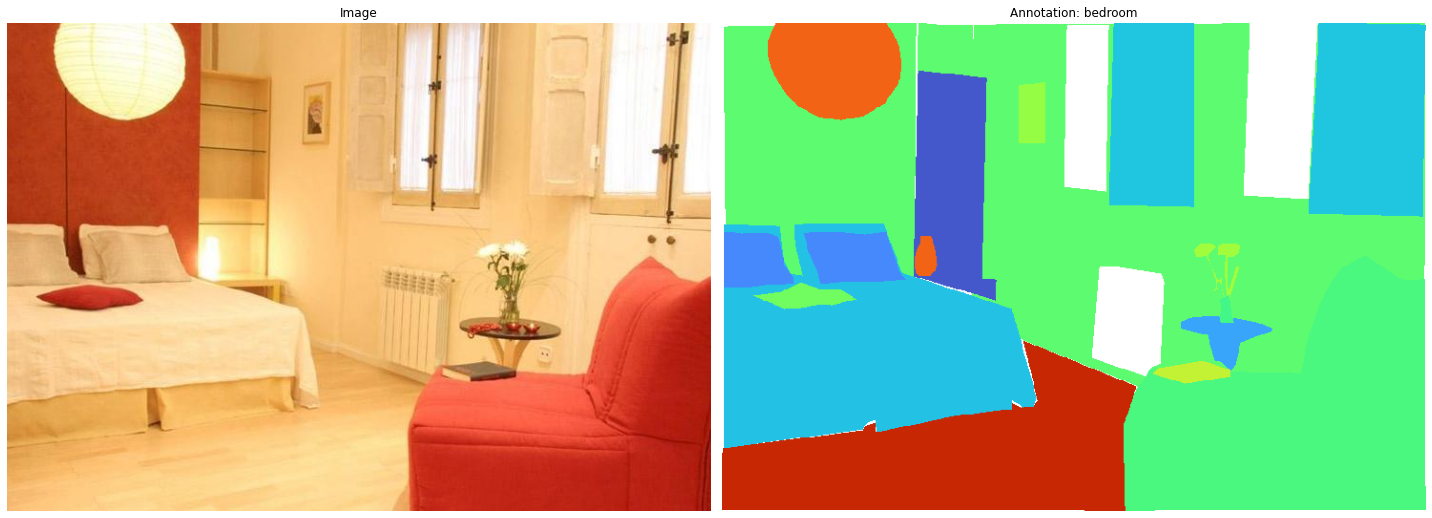

{1: 'wall', 4: 'floor, flooring', 8: 'bed ', 9: 'windowpane, window ', 16: 'table', 23: 'painting, picture', 31: 'armchair', 37: 'lamp', 40: 'cushion', 58: 'pillow', 63: 'bookcase', 67: 'flower', 68: 'book', 136: 'vase'}
dataset/ADEChallengeData2016/images/training/ADE_train_00001049.jpg
dataset/ADEChallengeData2016/annotations/training/ADE_train_00001049.png


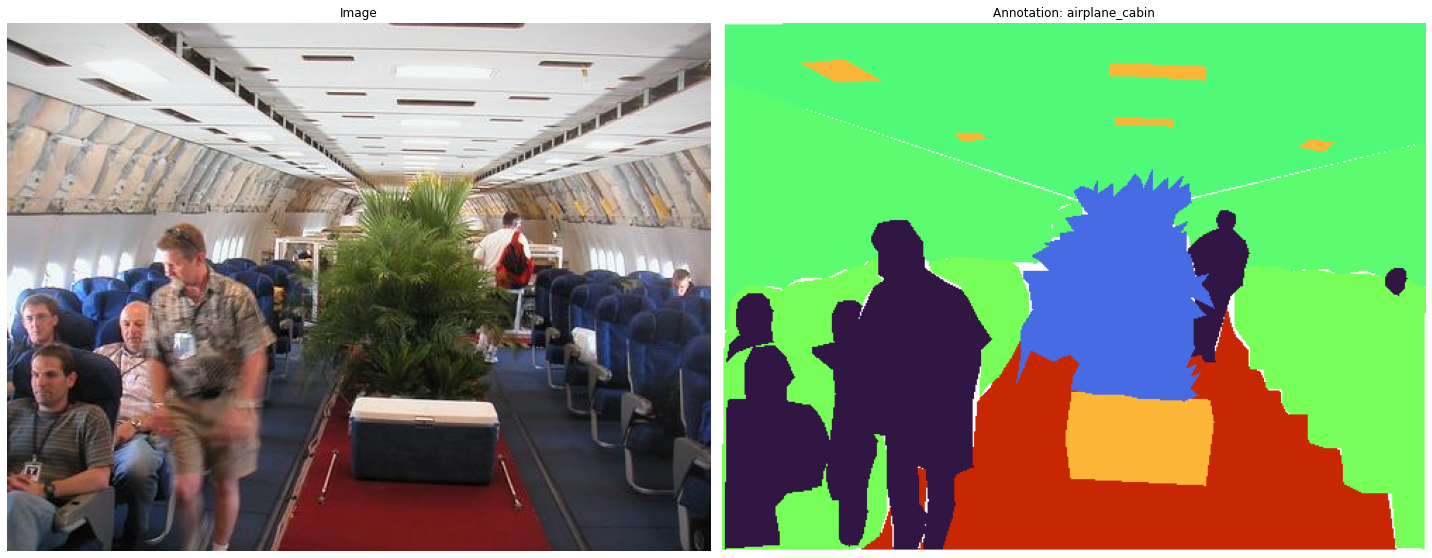

{1: 'wall', 4: 'floor, flooring', 6: 'ceiling', 13: 'person, individual, someone, somebody, mortal, soul', 18: 'plant, flora, plant life', 32: 'seat', 42: 'box', 83: 'light, light source'}
dataset/ADEChallengeData2016/images/training/ADE_train_00003096.jpg
dataset/ADEChallengeData2016/annotations/training/ADE_train_00003096.png


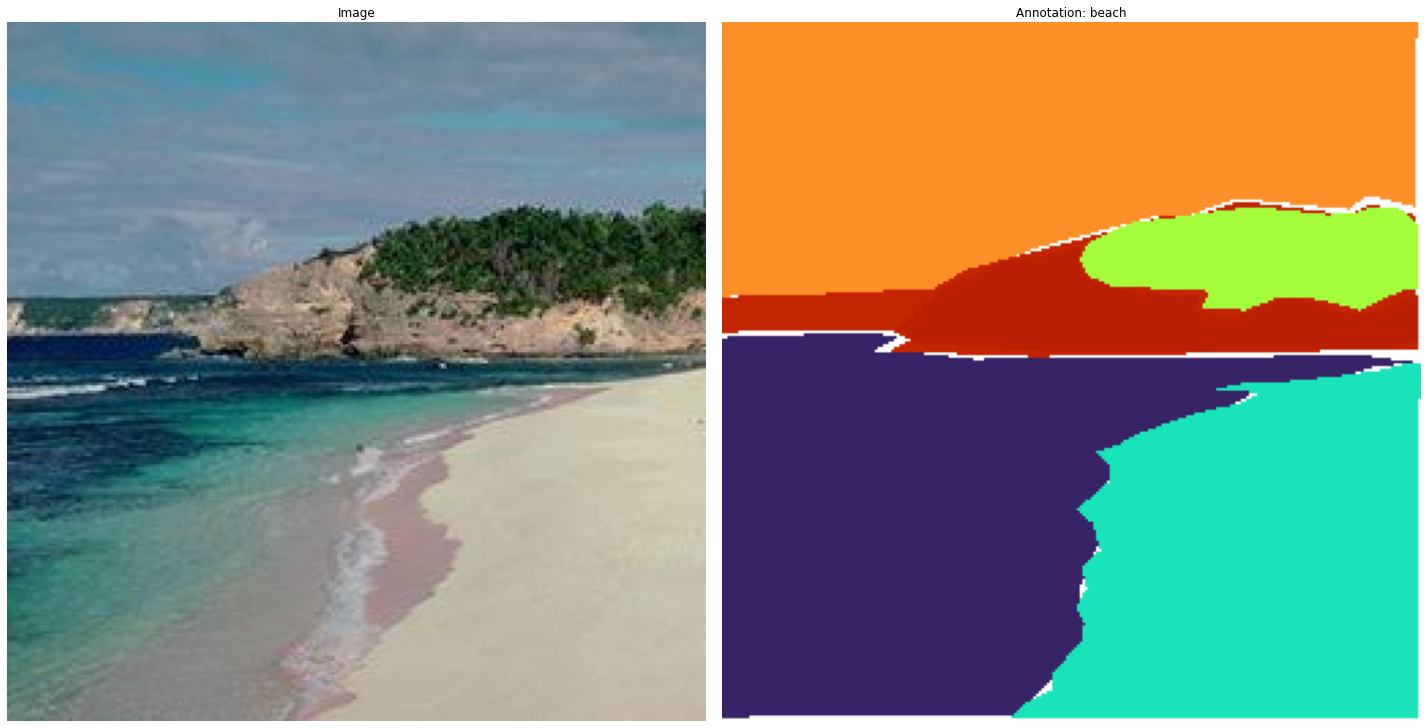

{3: 'sky', 5: 'tree', 27: 'sea', 35: 'rock, stone', 47: 'sand', 69: 'hill'}
dataset/ADEChallengeData2016/images/training/ADE_train_00018348.jpg
dataset/ADEChallengeData2016/annotations/training/ADE_train_00018348.png


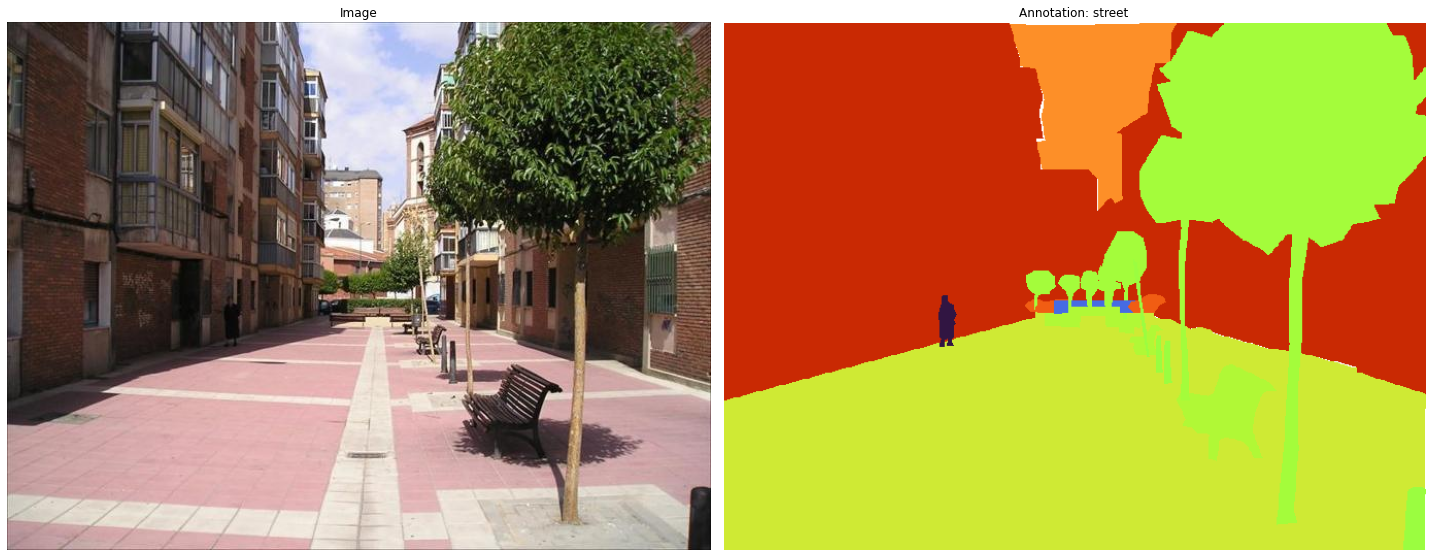

{2: 'building, edifice', 3: 'sky', 5: 'tree', 12: 'sidewalk, pavement', 13: 'person, individual, someone, somebody, mortal, soul', 18: 'plant, flora, plant life', 21: 'car, auto, automobile, machine, motorcar', 70: 'bench', 94: 'pole'}
dataset/ADEChallengeData2016/images/training/ADE_train_00007052.jpg
dataset/ADEChallengeData2016/annotations/training/ADE_train_00007052.png


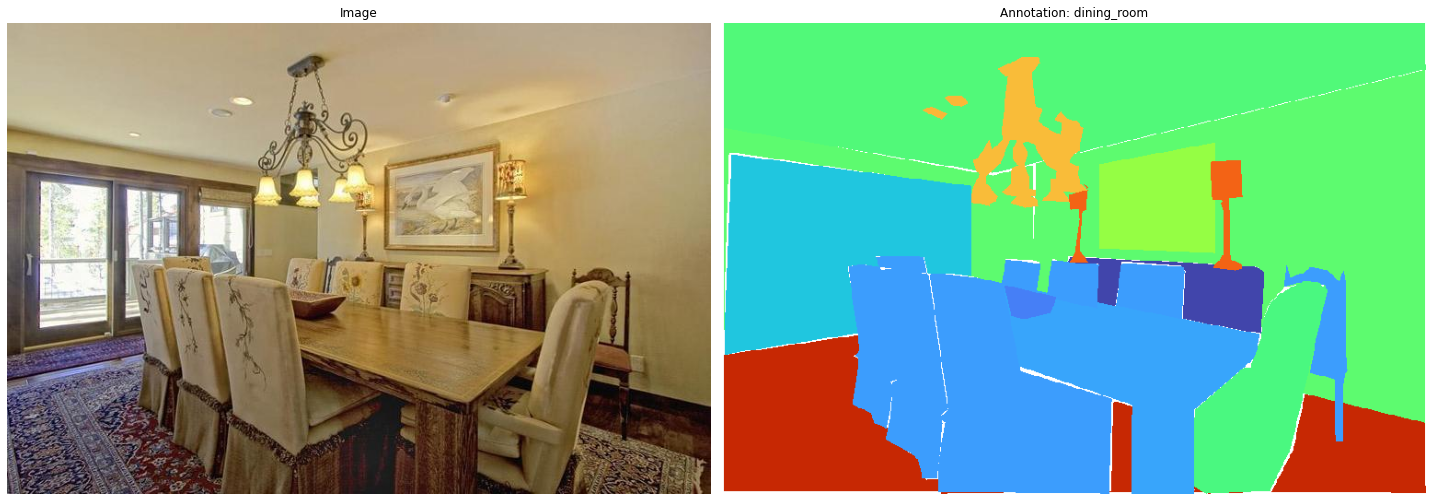

{1: 'wall', 4: 'floor, flooring', 6: 'ceiling', 9: 'windowpane, window ', 16: 'table', 20: 'chair', 23: 'painting, picture', 31: 'armchair', 37: 'lamp', 83: 'light, light source', 86: 'chandelier, pendant, pendent', 100: 'buffet, counter, sideboard', 138: 'tray'}


In [2]:
show_random_examples_from_path(
    dataset_path / "images/training",
    dataset_path / "annotations/training",
    scene_categories,
    objects_info,
)

### Compute mean and std

In [3]:
from src.utils import compute_images_mean_and_std

compute_images_mean_and_std(dataset_path / 'images/training')

  0%|          | 0/20210 [00:00<?, ?it/s]

mean: [0.49362224 0.46837934 0.43119125]
std:  [0.25736526 0.25561336 0.27486121]
